# Assignment On Preprocessing

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Loading the dataset

In [6]:
# Loading the dataset into the python rnvironment
df = pd.read_csv('/content/titanic_dataset.csv')

## Set Column 'PassengerId' as Index

In [7]:
df.set_index('PassengerId',inplace=True)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Check Some Basic Details

In [8]:
# Get the details on rows and columns
shape = df.shape
print("Number of rows:",shape[0])
print("Number of columns:",shape[1])

Number of rows: 891
Number of columns: 11


In [9]:
# Get more details on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
# Checking for the null values
print("NA values before:")
df.isnull().sum()

NA values before:


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# Checking for duplicates
df[df.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


It shows that there is no duplicate values in our dataset

## Filling the missing values

In [12]:
# There are three columns with missing values namely 'Age', 'Cabin' and 'Embarked'
# Let's handle three cases separatly

To fill the missing values in the column 'Embarked':
* There are only three values in this column S, C and Q.
* Majority embarked from 'S', so let's fill the missing two values with 'S'.

In [13]:
df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)

To fill the missing values in the column 'Cabin':
* Let's creat new vlue caleed 'Nil' and fill all Nan values with it.

In [14]:
df['Cabin'].fillna('Unknown', inplace=True)

To fill the missing values in the column 'Age':
* Here filling the 'null' values with forward-filling method, without losing the shape of the distribution plot and mean and median.

In [15]:
while bool(df['Age'].isnull().sum()):
   df['Age'].fillna(method='backfill',limit=2,inplace=True)
   df['Age'].fillna(method='ffill', limit=1,inplace=True)

In [16]:
# Checking for the null values
print("Null values after NA fill:")
df.isnull().sum()

Null values after NA fill:


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and Handle Outliers



In [36]:
# Creating a function to get the outliers

def checkOutlier(a,b):
  Q1 = a[b].quantile(0.25)
  Q3 = a[b].quantile(0.75)

  IQR = Q3 -Q1

  width = 1

  Max = Q3 + (width*IQR)
  Min = Q1 - (width*IQR)

  checkOutlier.Q1 = Q1


  checkOutlier.Max = Max
  checkOutlier.Min = Min

  # print ("Q1:",Q1)
  # print ("Q3:",Q3)
  # print ("IQR:",IQR)
  print ("Maximum Value:",Max)
  # print ("Minimum Value:",Min)

  return a[(a[b]<Min)|(a[b]>Max)]

## 1 . Outliers in 'Age'

<Axes: xlabel='Age'>

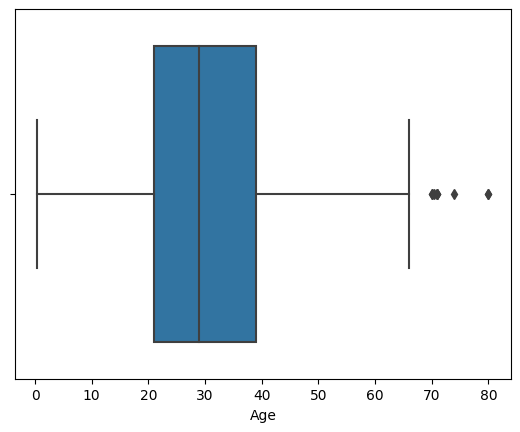

In [ ]:
sns.boxplot(x=df.Age)

In [35]:
checkOutlier(df,'Age').sort_values('Age')

Maximum Value: 55.2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,Unknown,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,Unknown,S
469,0,3,"Scanlan, Mr. James",male,0.75,0,0,36209,7.7250,Unknown,Q
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,Unknown,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,Unknown,C
...,...,...,...,...,...,...,...,...,...,...,...
494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,Unknown,C
96,0,3,"Shorney, Mr. Charles Joseph",male,71.00,0,0,374910,8.0500,Unknown,S
852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,Unknown,S


Decision : <u>Keep the data</u> \
\
Reason : The outlier values between 66 and 80 is plausible in the case of 'Age'.

## 2 . Outliers in 'Fare'

<Axes: xlabel='Fare'>

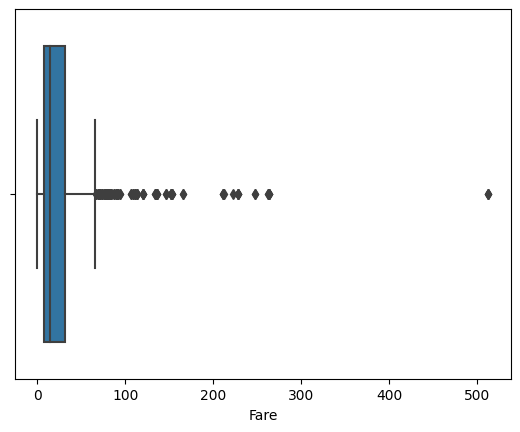

In [ ]:
sns.boxplot(x=df.Fare)

In [ ]:
checkOutlier(df,'Fare').sort_values('Fare')

Maximum Value: 65.6344
Minimum Value: -26.724


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
847,0,3,"Sage, Mr. Douglas Bullen",male,35.0,8,2,CA. 2343,69.5500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Decision : <u>Keep the data</u> \
\
Reason : The 'Fare' values out of the outlier values are possible in the real case scenario. And maximum value is $512 which can consider as luxury suit in the ship.

## 3 . Outliers in 'SibSp'

<Axes: xlabel='SibSp'>

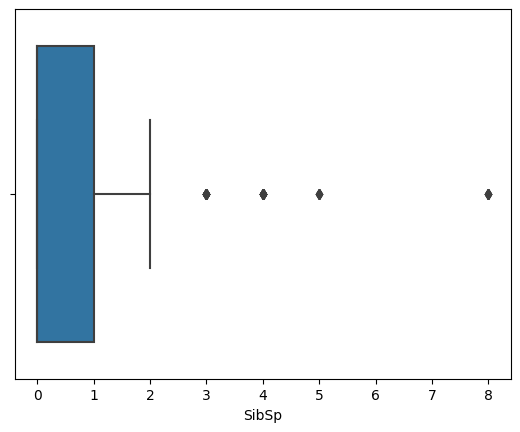

In [ ]:
sns.boxplot(x=df.SibSp)

In [ ]:
checkOutlier(df,'SibSp').sort_values('SibSp').head()

Maximum Value: 2.5
Minimum Value: -1.5


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,Unknown,S
375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,Unknown,S
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,Unknown,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.900,Unknown,S


Decision : <u>Keep the data</u> \
\
Reason : Sibilings or spouses boarding together between 3 and 8 is not consider as an oulier. It even cement when we check the family name of passengers, it is around the same number.

# MinMax Scaling

In [ ]:
# Separating the columns based on data type
# Since only numerical columns are subjected to Scaling
num_cols = df.select_dtypes(include=np.number)
cat_cols = df.select_dtypes(exclude=np.number)

# Spliting inti Feature set and Target
feature_set = num_cols.iloc[:,1:]
target_set = num_cols.iloc[:,:1]

# Initializing the scaling function
scaler = MinMaxScaler()

# Excute the scaling on our specific dataset
scaled = scaler.fit_transform(feature_set)

# Joint our all columns together and rearrange to older form
scaled_set = pd.DataFrame(scaled, columns=feature_set.columns).set_index(cat_cols.index)
new_df = cat_cols.join(scaled_set,how='left',rsuffix='Passenger_Id').join(target_set)
new_df = new_df.reindex(columns=df.columns)

print("Scaled dataset (MinMax Scaling):")
new_df

Scaled dataset (MinMax Scaling):


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.000000,A/5 21171,0.014151,Unknown,S
2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.000000,PC 17599,0.139136,C85,C
3,1,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.000000,STON/O2. 3101282,0.015469,Unknown,S
4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.000000,113803,0.103644,C123,S
5,0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.000000,373450,0.015713,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0.5,"Montvila, Rev. Juozas",male,0.334004,0.000,0.000000,211536,0.025374,Unknown,S
888,1,0.0,"Graham, Miss. Margaret Edith",female,0.233476,0.000,0.000000,112053,0.058556,B42,S
889,0,1.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.321438,0.125,0.333333,W./C. 6607,0.045771,Unknown,S


---